# **Package**

In [ ]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


# Required Libraries

In [40]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest, f_regression, chi2

# Statistical analysis
from scipy import stats
from scipy.stats import zscore

# Distance calculation
from math import radians, cos, sin, asin, sqrt

# Model persistence
import pickle

# Streamlit (for deployment)
import streamlit as st

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


# 1️⃣ Data Collection

In [1]:
import kagglehub
import warnings
warnings.filterwarnings("ignore")

# Download latest version
path = kagglehub.dataset_download("ivasanthp/tripfare-predicting-urban-taxi-fare")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\ivasa\.cache\kagglehub\datasets\ivasanthp\tripfare-predicting-urban-taxi-fare\versions\1


In [2]:
import os
os.listdir(path)

['taxi_fare.csv']

In [7]:
import pandas as pd
data = pd.read_csv(os.path.join(path, 'taxi_fare.csv'))
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


# 2️⃣ Data Understanding

#### Basic statistics

In [8]:
print("📊 BASIC STATISTICS:")
print(data.describe().T)

📊 BASIC STATISTICS:
                          count       mean        std         min        25%  \
VendorID               212345.0   1.708338   0.454529    1.000000   1.000000   
passenger_count        212345.0   1.766493   1.469647    0.000000   1.000000   
pickup_longitude       212345.0 -73.112122   7.936633 -121.933327 -73.990891   
pickup_latitude        212345.0  40.279405   4.370714    0.000000  40.740292   
RatecodeID             212345.0   1.034152   0.494699    1.000000   1.000000   
dropoff_longitude      212345.0 -73.144178   7.794599 -121.933327 -73.990570   
dropoff_latitude       212345.0  40.295648   4.293031    0.000000  40.740089   
payment_type           212345.0   1.324943   0.478255    1.000000   1.000000   
fare_amount            212345.0  12.665588  10.875584  -52.000000   6.500000   
extra                  212345.0   0.048077   0.148103   -0.500000   0.000000   
mta_tax                212345.0   0.497662   0.037436   -0.500000   0.500000   
tip_amount          

In [9]:
# Displaying first few rows for a quick look
data_head = data.head()
data_head

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [11]:
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

# 3️⃣ Feature Engineering:

In [12]:
# Convert UTC to EDT and extract time features
print("⏰ Converting pickup_datetime from UTC to EDT...")
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], utc=True)
data['tpep_pickup_datetime'] = data['tpep_pickup_datetime'].dt.tz_convert('America/New_York')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], utc=True)
data['tpep_dropoff_datetime'] = data['tpep_dropoff_datetime'].dt.tz_convert('America/New_York')

⏰ Converting pickup_datetime from UTC to EDT...


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype                           
---  ------                 --------------   -----                           
 0   VendorID               212345 non-null  int64                           
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns, America/New_York]
 2   tpep_dropoff_datetime  212345 non-null  datetime64[ns, America/New_York]
 3   passenger_count        212345 non-null  int64                           
 4   pickup_longitude       212345 non-null  float64                         
 5   pickup_latitude        212345 non-null  float64                         
 6   RatecodeID             212345 non-null  int64                           
 7   store_and_fwd_flag     212345 non-null  object                          
 8   dropoff_longitude      212345 non-null  float64                         
 9   dropoff_latitude       212

In [14]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


## Feature Engineering
* trip_distance_calculated: Use Haversine formula (from pickup & dropoff coordinates)
* trip_duration_calculated:

#### radius of the the earth
* in miles = 3,963.1 mi
* in km = 6,378 km

In [15]:
import math

In [16]:
from math import radians, sin, cos, asin, sqrt
import pandas as pd

# Haversine distance function
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points on Earth (in miles)
    using the Haversine formula
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))

    # Radius of Earth in miles
    r = 3963
    return c * r

In [17]:
# Feature engineering function
def feature_engineering(data):
    """
    Create new features from existing columns
    """
    print("🔧 Starting Feature Engineering...")
    data_clean = data.copy()

    # Calculate trip distance using Haversine formula
    print("📏 Calculating trip distances...")
    data_clean['trip_distance_calculated'] = data_clean.apply(
        lambda row: haversine_distance(
            row['pickup_longitude'], row['pickup_latitude'],
            row['dropoff_longitude'], row['dropoff_latitude']
        ), axis=1
    )

    print("✅ Feature engineering completed!")
    print(f"📊 New dataset shape: {data_clean.shape}")

    return data_clean

# Example usage:
# df_engineered will have all new features
data_engineered = feature_engineering(data)

# Now use df_engineered instead of data_clean
print(data_engineered.columns)

# If you want to replace the original dataset:
data = data_engineered.copy()


🔧 Starting Feature Engineering...
📏 Calculating trip distances...
✅ Feature engineering completed!
📊 New dataset shape: (212345, 19)
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_calculated'],
      dtype='object')


In [18]:
data['trip_duration_calculated'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [19]:
# Displaying the first few rows to check the conversion and the new column
data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance_calculated','trip_duration_calculated']].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance_calculated,trip_duration_calculated
0,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1.952013,7.916667
1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,2.676833,11.100000
2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,10.325908,31.100000
3,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5.627290,0.000000
4,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,12.689576,0.000000


In [20]:
print(f"Columns: {list(data.columns)}")

Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_distance_calculated', 'trip_duration_calculated']


In [21]:
# Pickup time feature
data['pickup_year'] = data['tpep_pickup_datetime'].dt.year
data['pickup_month'] = data['tpep_pickup_datetime'].dt.month
data['pickup_weekday_name'] = data['tpep_pickup_datetime'].dt.day_name()
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

In [22]:
# Dropoff time features
data['dropoff_year'] = data['tpep_dropoff_datetime'].dt.year
data['dropoff_month'] = data['tpep_dropoff_datetime'].dt.month
data['dropoff_weekday_name'] = data['tpep_dropoff_datetime'].dt.day_name()
data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour

In [23]:
print(f"Columns: {list(data.columns)}")

Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_distance_calculated', 'trip_duration_calculated', 'pickup_year', 'pickup_month', 'pickup_weekday_name', 'pickup_hour', 'dropoff_year', 'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour']


In [24]:
data['pickup_weekday_name'].unique()

array(['Monday', 'Thursday', 'Tuesday'], dtype=object)

In [25]:
data['dropoff_weekday_name'].nunique()

5

### pickup_day: Extract weekday/weekend

In [26]:
# Weekend indicator
# data['is_weekend'] = (data['pickup_weekday'] >= 5).astype(int)
# This is will not work as the given Dataset has been available for these weekdays monday, tuesday and thursday which falls in weekdays.

### Extract am/pm

In [27]:
# AM/PM indicator
data['is_pm'] = (data['pickup_hour'] >= 12).astype(int)
data['is_pm'] = (data['dropoff_hour'] >= 12).astype(int)

### is_night: Binary flag for late-night/early-morning trips

In [28]:
# Night ride indicator (10 PM to 6 AM)
data['is_night'] = ((data['pickup_hour'] >= 22) | (data['pickup_hour'] <= 6)).astype(int)
data['is_night'] = ((data['dropoff_hour'] >= 22) | (data['dropoff_hour'] <= 6)).astype(int)

In [29]:
# Rush hour indicators
data['is_morning_rush'] = ((data['pickup_hour'] >= 7) & (data['pickup_hour'] <= 9)).astype(int)
data['is_evening_rush'] = ((data['pickup_hour'] >= 17) & (data['pickup_hour'] <= 19)).astype(int)
data['is_morning_rush'] = ((data['dropoff_hour'] >= 7) & (data['dropoff_hour'] <= 9)).astype(int)
data['is_evening_rush'] = ((data['dropoff_hour'] >= 17) & (data['dropoff_hour'] <= 19)).astype(int)

In [30]:
# Fare per mile and fare per minute
# data['fare_per_mile'] = data['fare_amount'] / (df['trip_distance_calculated'] + 1e-8)
# data['fare_per_minute'] = data['fare_amount'] / (df['trip_duration_minutes'] + 1e-8)

In [31]:
# Speed (miles per hour)
# data['speed_mph'] = (data['trip_distance_calculated'] * 60) / (data['trip_duration_minutes'] + 1e-8)

In [32]:
# Passenger density feature
# data['fare_per_passenger'] = data['fare_amount'] / (data['passenger_count'] + 1e-8)

In [33]:
print(f"Columns: {list(data.columns)}")

Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_distance_calculated', 'trip_duration_calculated', 'pickup_year', 'pickup_month', 'pickup_weekday_name', 'pickup_hour', 'dropoff_year', 'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour', 'is_pm', 'is_night', 'is_morning_rush', 'is_evening_rush']


In [34]:
data.shape

(212345, 32)

In [35]:
data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime','store_and_fwd_flag','fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge'], axis=1, inplace=True)

In [36]:
# Data types
print("🔍 DATA TYPES:")
print(data.dtypes)
print("-" * 40)  # separator line
print(data.shape)

🔍 DATA TYPES:
VendorID                      int64
passenger_count               int64
pickup_longitude            float64
pickup_latitude             float64
RatecodeID                    int64
dropoff_longitude           float64
dropoff_latitude            float64
payment_type                  int64
total_amount                float64
trip_distance_calculated    float64
trip_duration_calculated    float64
pickup_year                   int32
pickup_month                  int32
pickup_weekday_name          object
pickup_hour                   int32
dropoff_year                  int32
dropoff_month                 int32
dropoff_weekday_name         object
dropoff_hour                  int32
is_pm                         int64
is_night                      int64
is_morning_rush               int64
is_evening_rush               int64
dtype: object
----------------------------------------
(212345, 23)


In [37]:
print(data.isnull().sum())
print("-" * 40)  # separator line
print(data.isna().sum())

VendorID                    0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
RatecodeID                  0
dropoff_longitude           0
dropoff_latitude            0
payment_type                0
total_amount                0
trip_distance_calculated    0
trip_duration_calculated    0
pickup_year                 0
pickup_month                0
pickup_weekday_name         0
pickup_hour                 0
dropoff_year                0
dropoff_month               0
dropoff_weekday_name        0
dropoff_hour                0
is_pm                       0
is_night                    0
is_morning_rush             0
is_evening_rush             0
dtype: int64
----------------------------------------
VendorID                    0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
RatecodeID                  0
dropoff_longitude           0
dropoff_latitude            0
payment_type                0
total_amount    

In [38]:
data.duplicated().sum()

np.int64(6)

# 4️⃣ Exploratory Data Analysis (EDA)

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
# Set up the plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)

### 1. Target variable distribution

🎯 Analyzing target variable distribution...


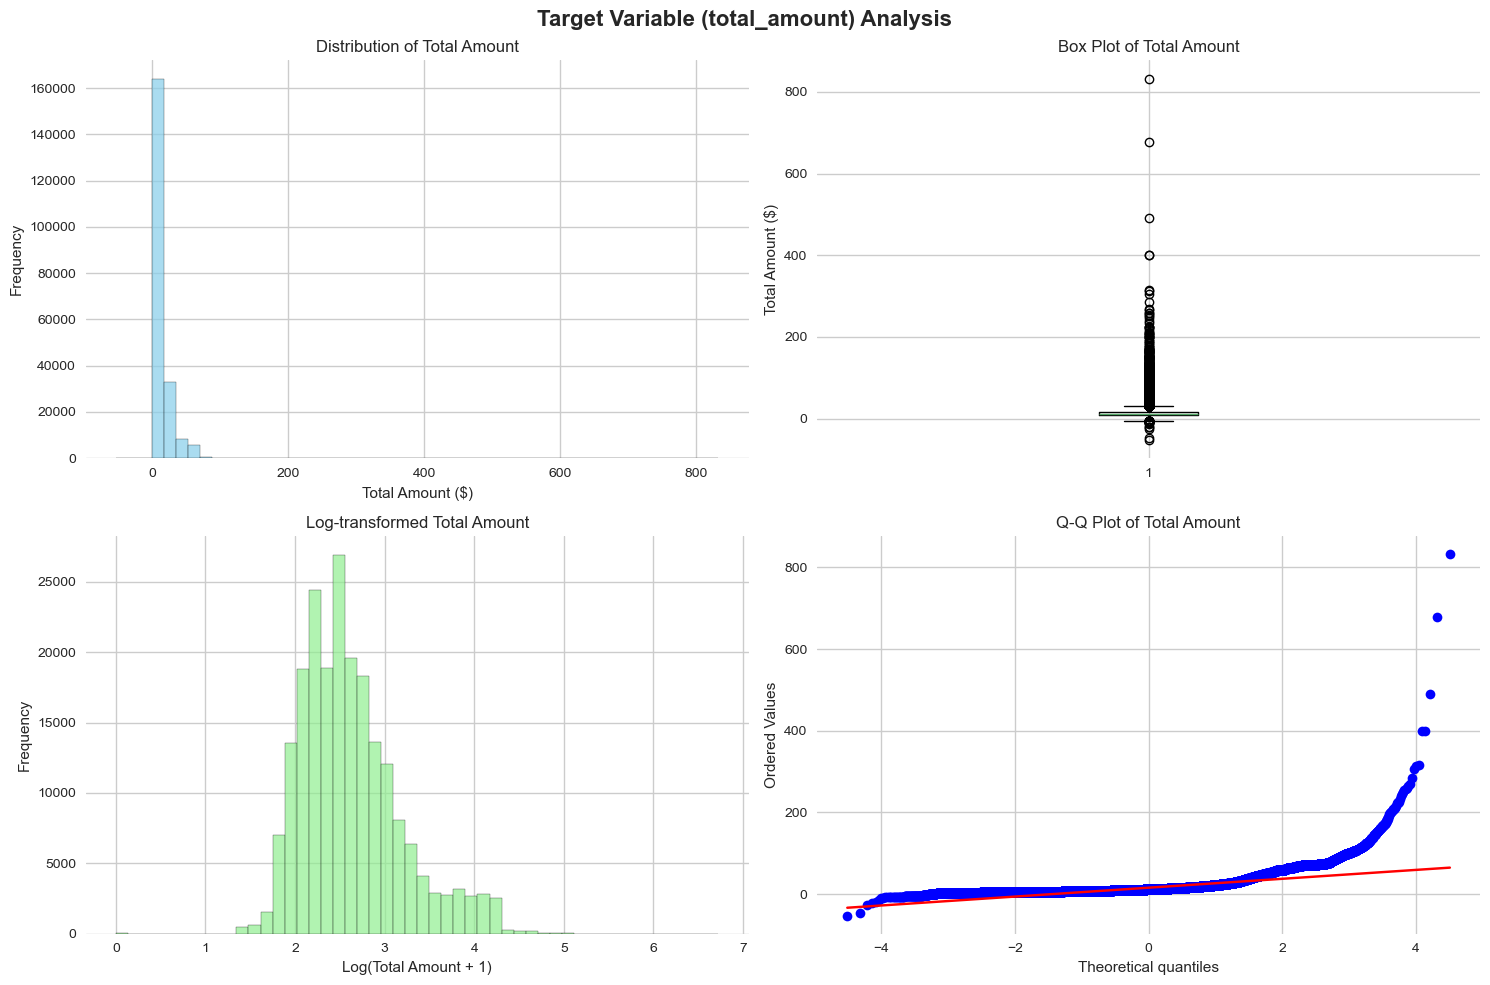

In [68]:
print("🎯 Analyzing target variable distribution...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Target Variable (total_amount) Analysis', fontsize=16, fontweight='bold')
 # Histogram
axes[0,0].hist(data['total_amount'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Total Amount')
axes[0,0].set_xlabel('Total Amount ($)')
axes[0,0].set_ylabel('Frequency')

# Box plot
axes[0,1].boxplot(data['total_amount'])
axes[0,1].set_title('Box Plot of Total Amount')
axes[0,1].set_ylabel('Total Amount ($)')
    
# Log transformation
log_total = np.log1p(data['total_amount'])
axes[1,0].hist(log_total, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Log-transformed Total Amount')
axes[1,0].set_xlabel('Log(Total Amount + 1)')
axes[1,0].set_ylabel('Frequency')
    
# Q-Q plot
stats.probplot(data['total_amount'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot of Total Amount')
    
plt.tight_layout()
plt.show()
    

In [96]:
# Both the log-transformed histogram and the Q-Q plot are used to check and improve the normality of total_amount,
# which helps meet assumptions for many statistical models and reduces skewness for better predictive performance.

In [71]:
# # 2. Correlation analysis
# print("🔗 Analyzing correlations...")
# numeric_cols = data.select_dtypes(include=[np.number]).columns
# correlation_matrix = data[numeric_cols].corr()
    
# plt.figure(figsize=(14, 10))
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
#             center=0, square=True, fmt='.2f')
# plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
# plt.tight_layout()
# plt.show()

### A. Univariate Analysis (Single Variable) - Histogram & Count plot

In [42]:
data.columns

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'dropoff_longitude', 'dropoff_latitude', 'payment_type',
       'total_amount', 'trip_distance_calculated', 'trip_duration_calculated',
       'pickup_year', 'pickup_month', 'pickup_weekday_name', 'pickup_hour',
       'dropoff_year', 'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour',
       'is_pm', 'is_night', 'is_morning_rush', 'is_evening_rush'],
      dtype='object')

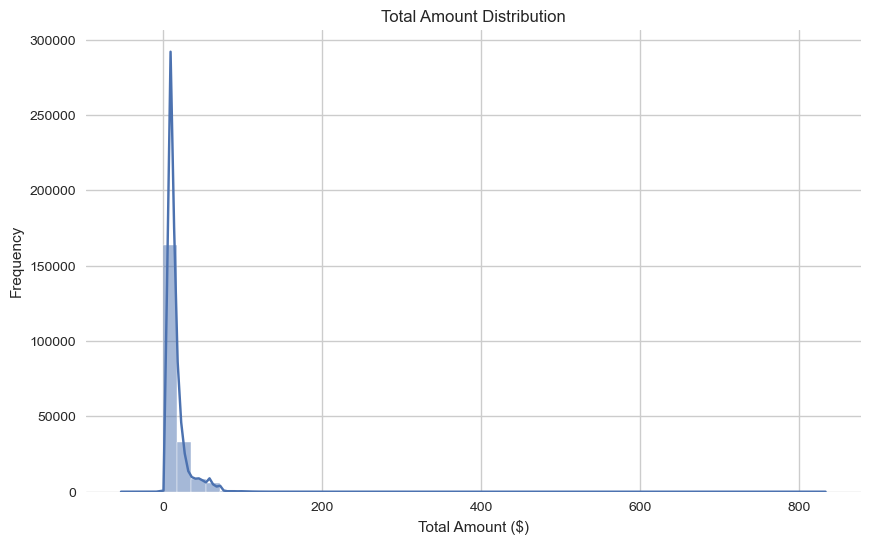

In [44]:
# Total amount distribution
sns.histplot(data['total_amount'], bins=50, kde=True)
plt.title("Total Amount Distribution")
plt.xlabel("Total Amount ($)")
plt.ylabel("Frequency")
plt.show()

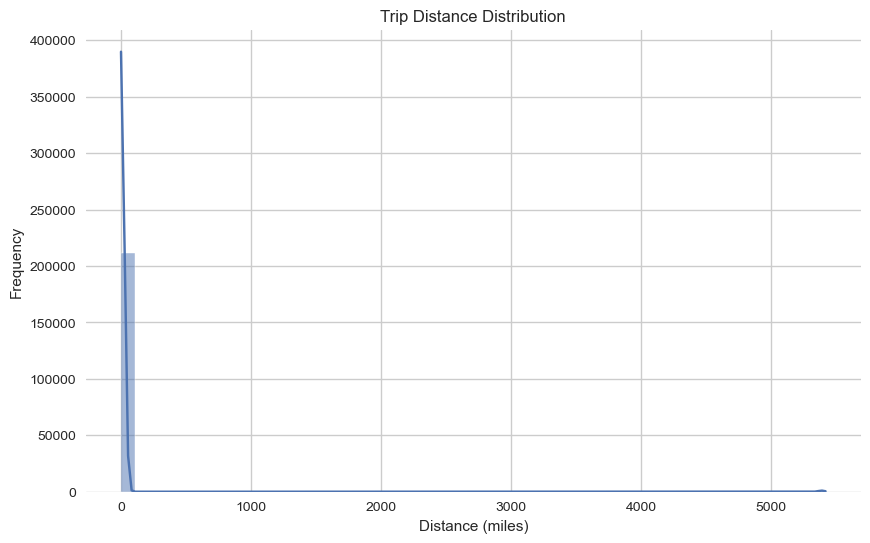

In [45]:
# Trip distance distribution
sns.histplot(data['trip_distance_calculated'], bins=50, kde=True)
plt.title("Trip Distance Distribution")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.show()

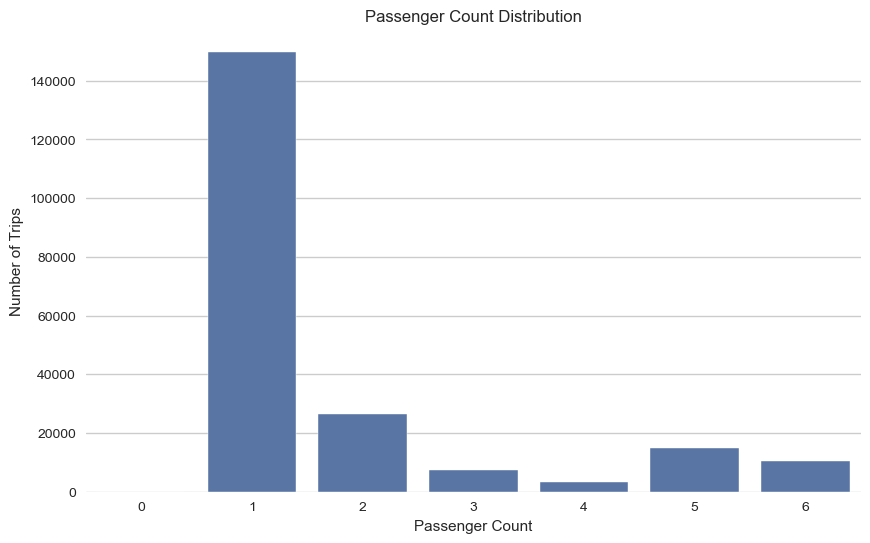

In [46]:
# Passenger count distribution
sns.countplot(x='passenger_count', data=data)
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.show()

### B. Bivariate Analysis (Relationships Between Variables)

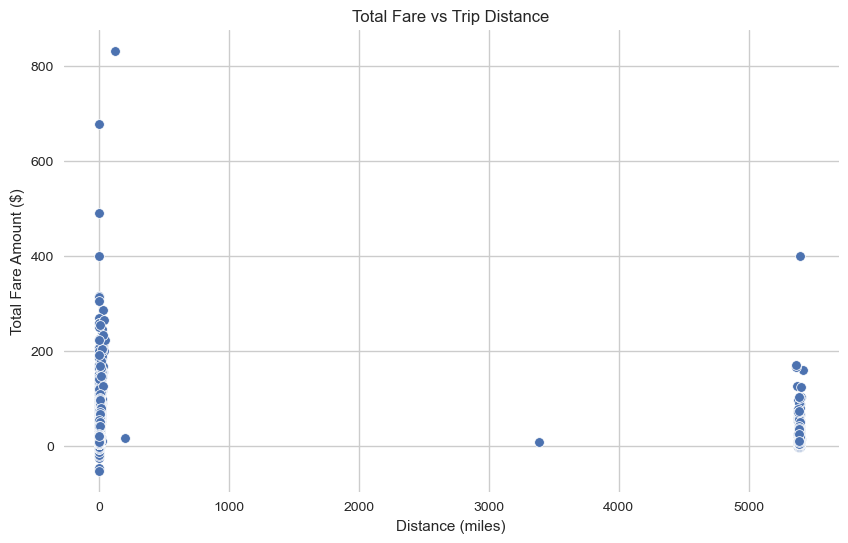

In [47]:
# Fare vs Distance
sns.scatterplot(x='trip_distance_calculated', y='total_amount', data=data)
plt.title("Total Fare vs Trip Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Total Fare Amount ($)")
plt.show()

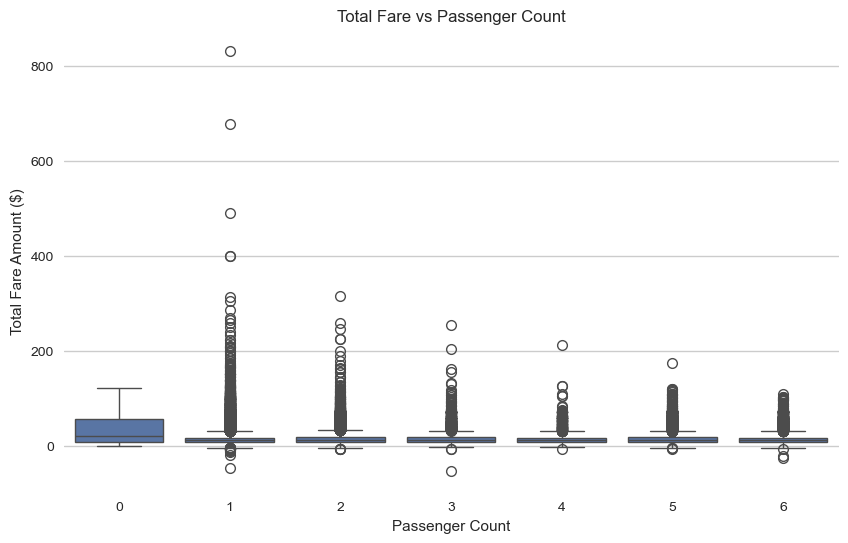

In [48]:
# Fare vs Passenger Count
sns.boxplot(x='passenger_count', y='total_amount', data=data)
plt.title("Total Fare vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Total Fare Amount ($)")
plt.show()

### C. Outlier Detection

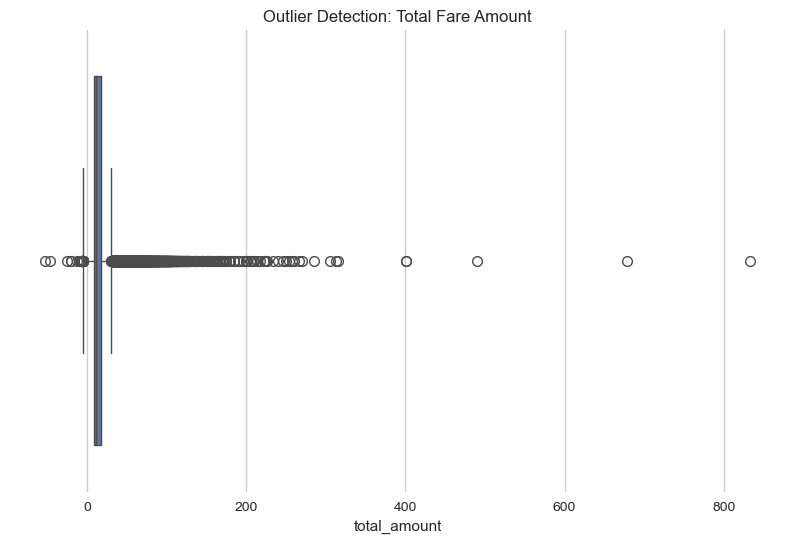

In [51]:
# Boxplots for outlier detection
sns.boxplot(x=data['total_amount'])
plt.title("Outlier Detection: Total Fare Amount")
plt.show()

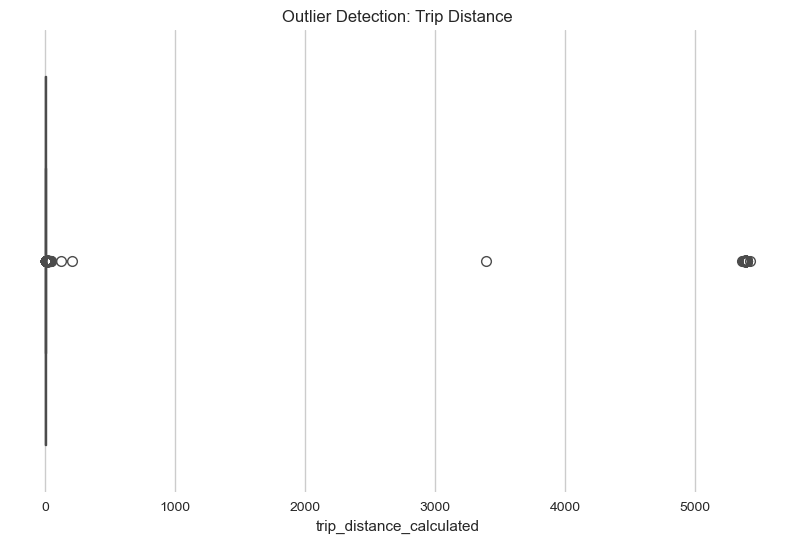

In [52]:
sns.boxplot(x=data['trip_distance_calculated'])
plt.title("Outlier Detection: Trip Distance")
plt.show()

### D. Time-based Analysis

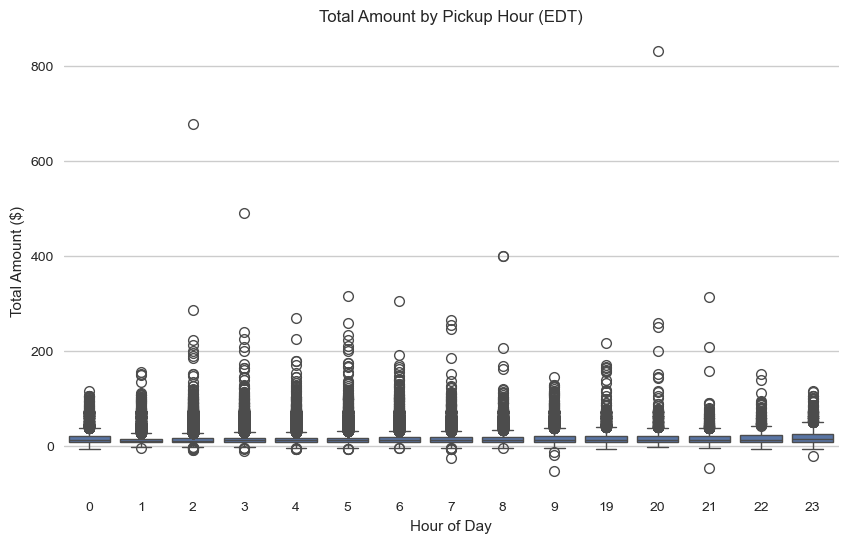

In [55]:
# Fare by hour of day
sns.boxplot(x='pickup_hour', y='total_amount', data=data)
plt.title("Total Amount by Pickup Hour (EDT)")
plt.xlabel("Hour of Day")
plt.ylabel("Total Amount ($)")
plt.show()

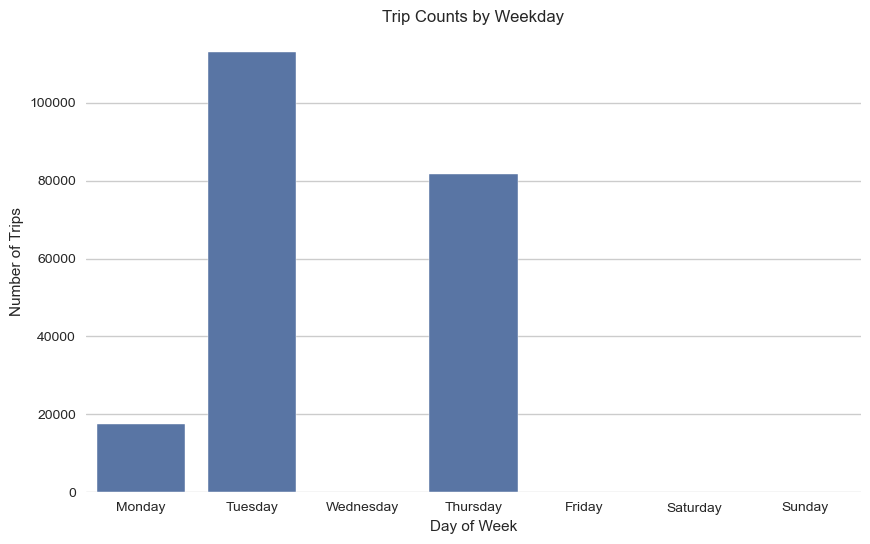

In [60]:
# Trip count by weekday
sns.countplot(x='pickup_weekday_name', data=data, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Trip Counts by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.show()

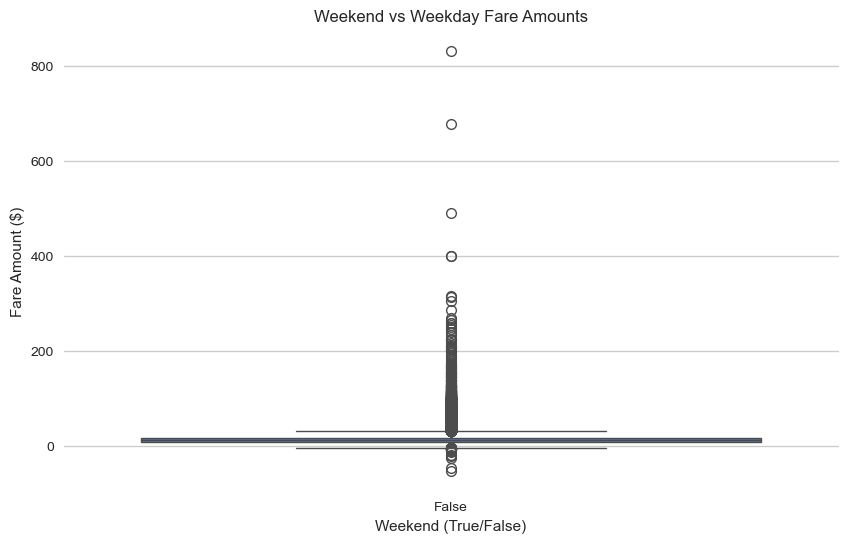

In [58]:
# Weekday vs Weekend
data['is_weekend'] = data['pickup_weekday_name'].isin([5, 6])  # 5=Sat, 6=Sun
sns.boxplot(x='is_weekend', y='total_amount', data=data)
plt.title("Weekend vs Weekday Fare Amounts")
plt.xlabel("Weekend (True/False)")
plt.ylabel("Fare Amount ($)")
plt.show()

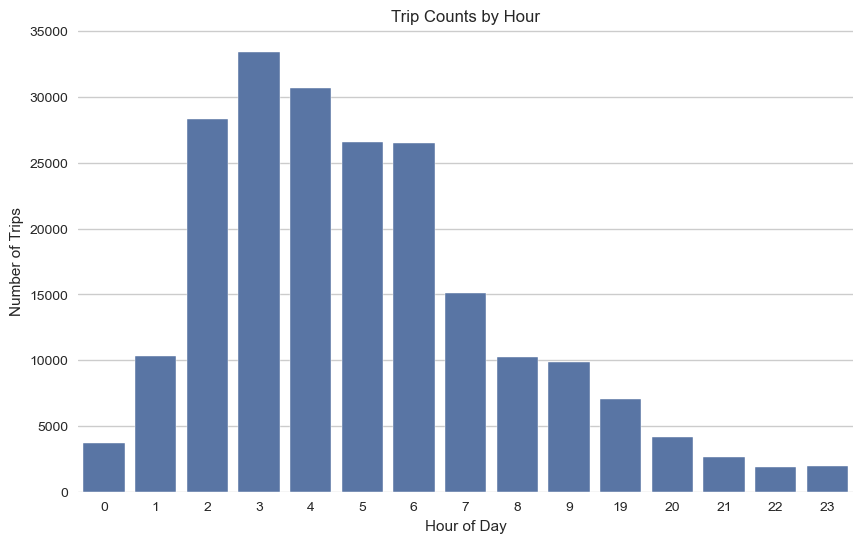

In [59]:
# Trip count by pickup hour
sns.countplot(x='pickup_hour', data=data)
plt.title("Trip Counts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

### E. Fare Per Mile & Fare Per Minute
* (Needs trip duration — assuming trip_duration_minutes column exists)

In [61]:
# Create new fare metrics
data['fare_per_mile'] = data['total_amount'] / data['trip_distance_calculated']
data['fare_per_minute'] = data['total_amount'] / data['trip_duration_calculated']

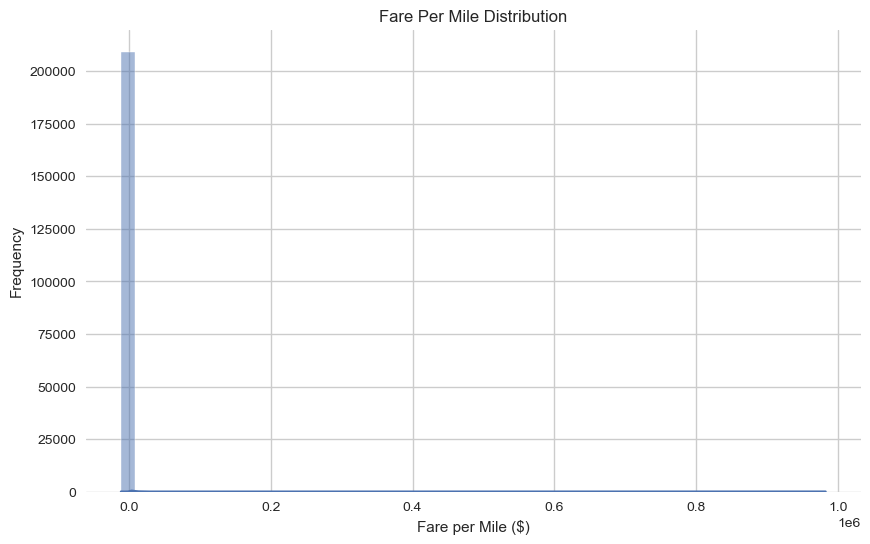

In [63]:
# Visualize
sns.histplot(data['fare_per_mile'], bins=50, kde=True)
plt.title("Fare Per Mile Distribution")
plt.xlabel("Fare per Mile ($)")
plt.ylabel("Frequency")
plt.show()

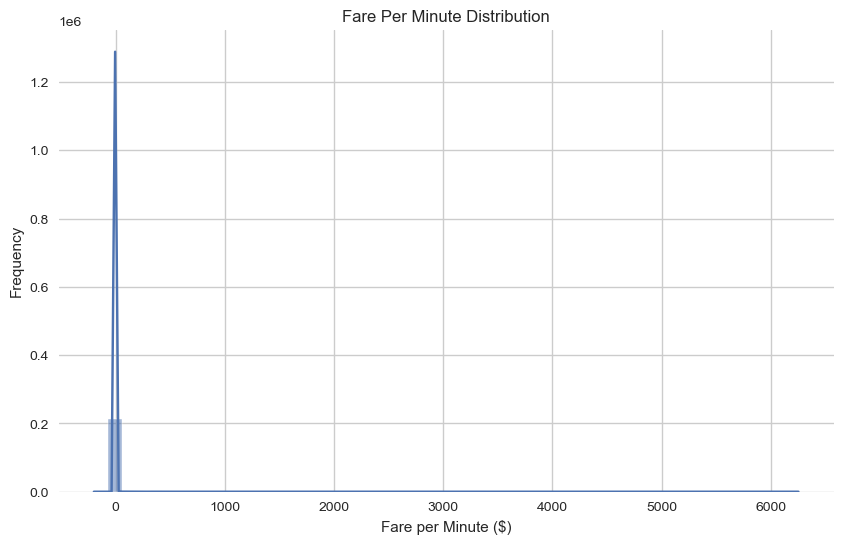

In [64]:
sns.histplot(data['fare_per_minute'], bins=50, kde=True)
plt.title("Fare Per Minute Distribution")
plt.xlabel("Fare per Minute ($)")
plt.ylabel("Frequency")
plt.show()